In [1]:
filename = './API/kakaoAPI.txt'
with open(filename) as f:
    api_key = f.read()

In [2]:
import requests
from urllib.parse import quote
import json

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
# from shapely.geometry import Polygon
%matplotlib inline
import matplotlib.font_manager
import re

# # 폰트 설정
# mpl.rc('font', family='NanumGothic')
# # 유니코드에서  음수 부호설정
# mpl.rc('axes', unicode_minus=False)

In [4]:
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

In [5]:
df = pd.read_csv('./시각화 데이터/og_data/12_20_oldman(노인).csv', encoding='cp949')

In [6]:
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,145935,2013098,1111018000,11110001,서울특별시 종로구1,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937,"{""type"":""Polygon"",""coordinates"":[[[126.9622309..."
1,144334,2013098,1111016700,11110002,서울특별시 종로구2,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104,"{""type"":""Polygon"",""coordinates"":[[[127.0060035..."
2,151689,2013098,1111015400,11110003,서울특별시 종로구3,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706,"{""type"":""Polygon"",""coordinates"":[[[126.9952475..."
3,151688,2013098,1111017400,11110004,서울특별시 종로구4,서울특별시 종로구 창신동(동묘앞역_다산로_진입 부근),6,6,1,5,0,0,127.016856,37.572359,"{""type"":""Polygon"",""coordinates"":[[[127.0184565..."
4,144645,2013098,1114016000,11140001,서울특별시 중구1,서울특별시 중구 인현동1가(대림상가앞 부근),3,3,0,1,2,0,126.995341,37.566380,"{""type"":""Polygon"",""coordinates"":[[[126.9969423..."


In [7]:
# 시도시군구명, 지점명, 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수, 경도, 위도 컬럼만 선택
df1 = df[['시도시군구명', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]

In [8]:
df1.head()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시 종로구1,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937
1,서울특별시 종로구2,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104
2,서울특별시 종로구3,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706
3,서울특별시 종로구4,서울특별시 종로구 창신동(동묘앞역_다산로_진입 부근),6,6,1,5,0,0,127.016856,37.572359
4,서울특별시 중구1,서울특별시 중구 인현동1가(대림상가앞 부근),3,3,0,1,2,0,126.995341,37.566380


In [9]:
# 서울특별시 행들만 선택
df2 = df1[df1['시도시군구명'].str.contains('서울특별시')]
df2.tail()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
4581,서울특별시 강동구1,서울특별시 강동구 암사동(암사시장 부근),5,5,0,1,4,0,127.128676,37.551215
4582,서울특별시 강동구2,서울특별시 강동구 천호동(천호사거리 부근),4,4,0,3,1,0,127.123545,37.538955
4583,서울특별시 강동구3,서울특별시 강동구 천호동(천호시장사거리 부근),4,4,0,2,1,1,127.127767,37.540450
4584,서울특별시 강동구4,서울특별시 강동구 암사동(장치봉의맵꼬만명태찜 부근),3,3,0,3,0,0,127.134524,37.551891
4585,서울특별시 강동구5,서울특별시 강동구 천호동(강동구민회관 부근),3,3,0,2,1,0,127.141572,37.546180


In [10]:
# 시도, 시구 컬럼 분할
df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
df2.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8020\1697275363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8020\1697275363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)


,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구1,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937,서울특별시,종로구1
1,서울특별시 종로구2,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104,서울특별시,종로구2
2,서울특별시 종로구3,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706,서울특별시,종로구3
3,서울특별시 종로구4,서울특별시 종로구 창신동(동묘앞역_다산로_진입 부근),6,6,1,5,0,0,127.016856,37.572359,서울특별시,종로구4
4,서울특별시 중구1,서울특별시 중구 인현동1가(대림상가앞 부근),3,3,0,1,2,0,126.995341,37.566380,서울특별시,중구1


In [11]:
df2 = df2.drop('시도시군구명', axis=1)
df2

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937,서울특별시,종로구1
1,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104,서울특별시,종로구2
2,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706,서울특별시,종로구3
3,서울특별시 종로구 창신동(동묘앞역_다산로_진입 부근),6,6,1,5,0,0,127.016856,37.572359,서울특별시,종로구4
4,서울특별시 중구 인현동1가(대림상가앞 부근),3,3,0,1,2,0,126.995341,37.566380,서울특별시,중구1
...,...,...,...,...,...,...,...,...,...,...,...
4581,서울특별시 강동구 암사동(암사시장 부근),5,5,0,1,4,0,127.128676,37.551215,서울특별시,강동구1
4582,서울특별시 강동구 천호동(천호사거리 부근),4,4,0,3,1,0,127.123545,37.538955,서울특별시,강동구2
4583,서울특별시 강동구 천호동(천호시장사거리 부근),4,4,0,2,1,1,127.127767,37.540450,서울특별시,강동구3
4584,서울특별시 강동구 암사동(장치봉의맵꼬만명태찜 부근),3,3,0,3,0,0,127.134524,37.551891,서울특별시,강동구4


In [12]:
df2  = df2[['시도', '시군구', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]
df2.head()

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구1,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937
1,서울특별시,종로구2,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104
2,서울특별시,종로구3,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706
3,서울특별시,종로구4,서울특별시 종로구 창신동(동묘앞역_다산로_진입 부근),6,6,1,5,0,0,127.016856,37.572359
4,서울특별시,중구1,서울특별시 중구 인현동1가(대림상가앞 부근),3,3,0,1,2,0,126.995341,37.566380


In [13]:
# 시군구 숫자제거
df2['시군구'] = df2['시군구'].apply(lambda x: re.sub(r'\d+', '', x))
df2.head(3)

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구,서울특별시 종로구 교북동(독립문_의주로_진출_1 부근),3,3,0,3,0,0,126.960630,37.571937
1,서울특별시,종로구,서울특별시 종로구 충신동(이화사거리 부근),5,5,0,5,0,0,127.004402,37.576104
2,서울특별시,종로구,서울특별시 종로구 장사동(종묘공원 부근),6,6,0,4,1,1,126.993647,37.570706


In [14]:
# 구별로 그룹화
df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')
df3.head(3)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_8020\3476045755.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')


,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
시군구,,,,,,
강남구,94,102,7,49,39,7
강동구,203,214,10,118,78,8
강북구,317,350,19,183,142,6


In [15]:
# 발생건수만 사용
df4 = df3.groupby('시군구')['발생건수'].sum()
df4

시군구
강남구      94
강동구     203
강북구     317
강서구     184
관악구     322
광진구      70
구로구     199
금천구     138
노원구     167
도봉구     179
동대문구    561
동작구     243
마포구     105
서대문구    238
서초구      96
성동구     151
성북구     366
송파구     183
양천구     171
영등포구    260
용산구      85
은평구     291
종로구     202
중구      185
중랑구     287
Name: 발생건수, dtype: int64

<Axes: xlabel='시군구'>

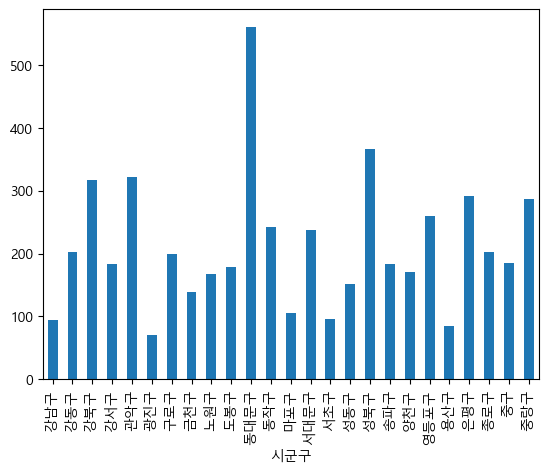

In [16]:
#구별 노인 사고 발생건수
df4.plot.bar()

<Axes: xlabel='시군구'>

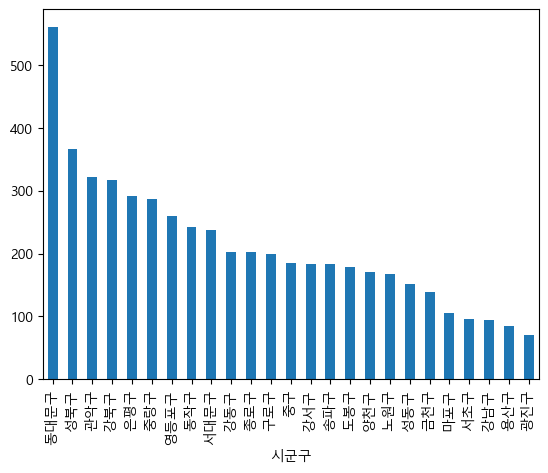

In [17]:
# 구별 노인 사고 발생건수 내림차순
df4.sort_values(ascending=False).plot.bar()

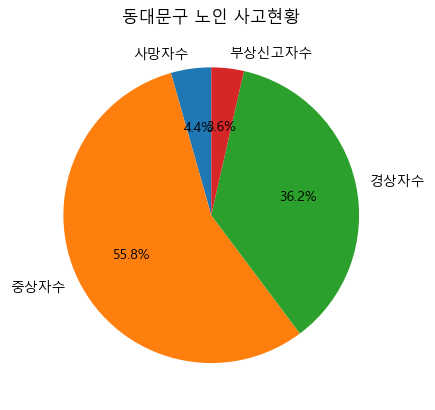

In [28]:
# CCTV 개수가 가장 적은 동대문구 노인 교통사고
# 발생건수,사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

dong_pie = df3.loc['동대문구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(dong_pie, labels=dong_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('동대문구 노인 사고현황')
plt.show()

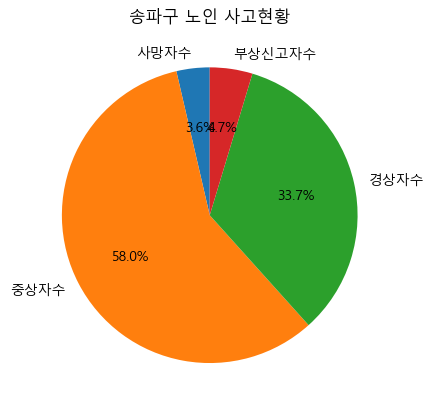

In [29]:
# CCTV 개수가 가장 적은 송파구 노인 교통사고 
# 발생건수 , 사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

song_pie = df3.loc['송파구',['사망자수', '중상자수', '경상자수', '부상신고자수']]

#파이차트

plt.pie(song_pie, labels=song_pie.index, autopct='%1.1f%%', startangle=90)
plt.title('송파구 노인 사고현황')
plt.show()

In [20]:
center = [37.5502, 126.982]

# folium
map = folium.Map(location=center, zoom_start=11)

# 각 데이터 포인트마다 지도에 마커를 추가합니다
for idx, row in df2.iterrows():
    lon, lat = row['경도'], row['위도']
    # 마커
    marker = folium.Marker(location=[lat, lon])
    # 맵에 마커를 추가
    marker.add_to(map)

map

In [21]:
df2.to_csv('노인사고다발지역.csv', index=False)

In [22]:
# 노인 사고 다발지역 위치를  Marker로 표시
for name, lat, lng in zip(df2.지점명, df2.위도, df2.경도):
    folium.Marker([lat, lng], popup=name).add_to(map)
map

In [32]:
# 동대문구 노인 사고 다발지역

# 송파구 중심 좌표
center = [37.583869, 127.050022]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 송파구에 해당하는 데이터만 필터링
songpa = df2[df2['시군구'] == '동대문구']

# 데이터를 이용하여 지도에 마커 생성
for index, row in songpa.iterrows():
    lat = row['위도']
    lng = row['경도']
    location = [lat, lng]
    tooltip = f"{row['지점명']}\n발생건수: {row['발생건수']}\n사상자수: {row['사상자수']}"
    folium.Marker(location=location, tooltip=tooltip).add_to(map)

# 지도 출력
map

In [30]:

# 송파구 노인 사고 다발지역 

# 송파구 중심 좌표
center = [37.504493, 127.114464]

# 지도 객체 생성
map = folium.Map(location=center, zoom_start=12)

# 송파구에 해당하는 데이터만 필터링
songpa = df2[df2['시군구'] == '송파구']

# 데이터를 이용하여 지도에 마커 생성
for index, row in songpa.iterrows():
    lat = row['위도']
    lng = row['경도']
    location = [lat, lng]
    tooltip = f"{row['지점명']}\n발생건수: {row['발생건수']}\n사상자수: {row['사상자수']}"
    folium.Marker(location=location, tooltip=tooltip).add_to(map)

# 지도 출력
map

In [33]:
df2.to_csv('노인 보행자 사고다발지역.csv', index=False)